### Autor(es): Andrei Silva Santos e Laverty Diderone de Assis Ladeia
Programa de Pós-Graduação em Modelagem Computacional</br></br>
Disciplina: Métodos Numéricos</br></br>
Turma: 2024.1</br></br>
Plataforma:</br></br>
- CPU: 12th Gen Intel(R) Core(TM) i5-12500H, 16 núcleos 4.5 GHz
- Memory: 8GiB 4800 MT/s
- Swap: 16GiB
- GPU: GeForce RTX 3050
- SO: Ubuntu 22.04
- Python 3.1erro_aceitavel2
- Driver Version: 550.54.14
- CUDA Version: 12.4

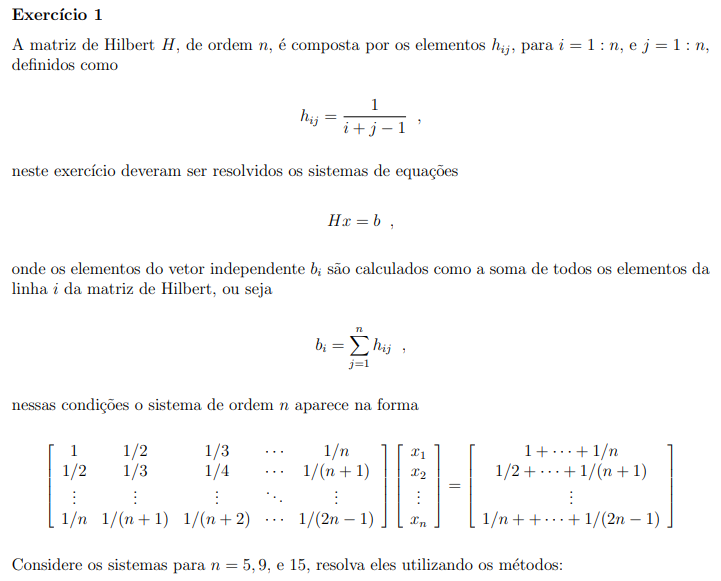

### Gerando as 3 Matrizes de Hilbert do Exercício

In [159]:
import os
import numpy as np
import time 
import matplotlib.pyplot as plt

os.sched_setaffinity(0, {0})

def matriz_hilbert(n):
    matrizH = np.zeros((n, n))
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            matrizH[i-1, j-1] = 1 / (i + j - 1)
    return matrizH

def print_matriz(matriz):
    for row in matriz:
        print("|", end=" ")
        for elem in row:
            print("{:.3f}".format(elem), end=" ")
        print("|")

n = [5, 9, 15]
metodos = ['Gauss com substituição regressiva','Gauss com pivoteamento parcial','Gauss com pivoteamento parcial com escala','Gauss com pivoteamento total','Jacobi','Gauss-Seidel','Sobre-relaxamento']
matrizes = [matriz_hilbert(i) for i in n] # Gerando as matrizes de Hilbert
B = [np.sum(matrizes[i], axis=1) for i in range(len(matrizes))] # Gerando os vetores B

metodos_vetor_solucao = [[np.zeros(len(matrizes[i])) for i in range(len(n))] for linha in metodos]
metodos_tempo_execucao = np.zeros((7, 3))
vetores_solucao = [np.ones(i) for i in n]

for i in range(0, len(matrizes)):
    print("Matriz de Hilbert de Ordem", n[i], ":\n")
    print_matriz(matrizes[i])
    print("\n")

Matriz de Hilbert de Ordem 5 :

| 1.000 0.500 0.333 0.250 0.200 |
| 0.500 0.333 0.250 0.200 0.167 |
| 0.333 0.250 0.200 0.167 0.143 |
| 0.250 0.200 0.167 0.143 0.125 |
| 0.200 0.167 0.143 0.125 0.111 |


Matriz de Hilbert de Ordem 9 :

| 1.000 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 |
| 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 |
| 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 |
| 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 |
| 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 |
| 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 |
| 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.067 |
| 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.062 |
| 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.062 0.059 |


Matriz de Hilbert de Ordem 15 :

| 1.000 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.067 |
| 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.062 |
| 0.333 0.250 0.200

#### a) Eliminação de Gauss com substituição regressiva

In [160]:
# O indice [n, -1] da matriz aumentada é a coluna que representa o vetor independente bi
# Vetor solucao xi é instanciado com o número de linhas da matriz e valores iguais a zero

def eliminacao_Gauss_SR(matriz):
    n = len(matriz) - 1 ## Removendo o b

    # Fase eliminação de Gauss
    for k in range(n):
        for i in range(k + 1, n + 1):
            fator = matriz[i][k] / matriz[k][k]
            for j in range(k + 1, n + 1):
                matriz[i][j] -= fator * matriz[k][j]
            matriz[i][n+1] -= fator * matriz[k][n+1]

    # Fase substituição regressiva
    vetor_solucao = np.zeros(n+1)
    vetor_solucao[n] = matriz[n][n+1] / matriz[n][n]
    for i in range(n - 1, -1, -1):
        soma = matriz[i][n+1]
        for j in range(i + 1, n+1):
            soma -= matriz[i][j] * vetor_solucao[j]
        vetor_solucao[i] = soma / matriz[i][i]

    return vetor_solucao

for i in range(0, len(matrizes)):
    inicio = time.perf_counter() 
    matriz_aumentada = np.column_stack((matrizes[i], B[i]))

    print(f"\nMatriz Aumentada com n={len(matriz_aumentada)}:")
    print_matriz(matriz_aumentada)

    metodos_vetor_solucao[0][i] = eliminacao_Gauss_SR(matriz_aumentada)
    metodos_tempo_execucao[0][i] = (time.perf_counter()  - inicio) * 1000 # Convertendo para milisengundos

    print("\nMatriz Resultante:")
    print_matriz(matriz_aumentada)




Matriz Aumentada com n=5:
| 1.000 0.500 0.333 0.250 0.200 2.283 |
| 0.500 0.333 0.250 0.200 0.167 1.450 |
| 0.333 0.250 0.200 0.167 0.143 1.093 |
| 0.250 0.200 0.167 0.143 0.125 0.885 |
| 0.200 0.167 0.143 0.125 0.111 0.746 |

Matriz Resultante:
| 1.000 0.500 0.333 0.250 0.200 2.283 |
| 0.500 0.083 0.083 0.075 0.067 0.308 |
| 0.333 0.083 0.006 0.008 0.010 0.023 |
| 0.250 0.075 0.008 0.000 0.001 0.001 |
| 0.200 0.067 0.010 0.001 0.000 0.000 |

Matriz Aumentada com n=9:
| 1.000 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 2.829 |
| 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 1.929 |
| 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 1.520 |
| 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 1.270 |
| 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 1.097 |
| 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.968 |
| 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.868 |
| 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.062 0.788 |
| 0.111 0.100 

#### b) Eliminação de Gauss com pivoteamento parcial

In [161]:
def pivoteamento_parcial(matriz_aumentada):
    # Crie uma cópia da matriz aumentada para evitar a modificação da original
    matriz_pivotada = [linha.copy() for linha in matriz_aumentada]
    n = len(matriz_pivotada)
    for i in range(n):
        indice_maximo = i
        ## Encontrando o indice do elemento de maior valor absoluto
        for j in range(i+1, n):
            if abs(matriz_pivotada[j][i]) > abs(matriz_pivotada[indice_maximo][i]):
                indice_maximo = j
        
        # Troca a linha atual pela linha com o maior elemento
        matriz_pivotada[i], matriz_pivotada[indice_maximo] = matriz_pivotada[indice_maximo], matriz_pivotada[i]

    return matriz_pivotada

for i in range(0, len(matrizes)):
    inicio = time.perf_counter() 
    matriz_aumentada = np.column_stack((matrizes[i], B[i]))
    
    # Fase de Pivoteamento
    matriz_pivotada = pivoteamento_parcial(matriz_aumentada)
    print(f"\nMatriz Pivotada com n={len(matrizes[i])}:")
    print_matriz(matriz_pivotada)

    # Fase de Eliminaçcão de Gauss
    metodos_vetor_solucao[1][i] = eliminacao_Gauss_SR(matriz_pivotada)
    metodos_tempo_execucao[1][i] = (time.perf_counter()  - inicio) * 1000 # Convertendo para milisengundos

    print("\nVetor Solução: ", metodos_vetor_solucao[1][i])

    print("\nMatriz Resultante:")
    print_matriz(matriz_pivotada)



Matriz Pivotada com n=5:
| 1.000 0.500 0.333 0.250 0.200 2.283 |
| 0.500 0.333 0.250 0.200 0.167 1.450 |
| 0.333 0.250 0.200 0.167 0.143 1.093 |
| 0.250 0.200 0.167 0.143 0.125 0.885 |
| 0.200 0.167 0.143 0.125 0.111 0.746 |

Vetor Solução:  [1. 1. 1. 1. 1.]

Matriz Resultante:
| 1.000 0.500 0.333 0.250 0.200 2.283 |
| 0.500 0.083 0.083 0.075 0.067 0.308 |
| 0.333 0.083 0.006 0.008 0.010 0.023 |
| 0.250 0.075 0.008 0.000 0.001 0.001 |
| 0.200 0.067 0.010 0.001 0.000 0.000 |

Matriz Pivotada com n=9:
| 1.000 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 2.829 |
| 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 1.929 |
| 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 1.520 |
| 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 1.270 |
| 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 1.097 |
| 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.968 |
| 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.868 |
| 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.

#### c) Eliminação de Gauss com pivoteamento parcial com escala

In [162]:
def pivoteamento_parcial_escala(matriz_aumentada):
    # Crie uma cópia da matriz aumentada para evitar a modificação da original
    matriz_pivotada = np.array(matriz_aumentada)
    n = len(matriz_pivotada)
    escalas = np.max(np.abs(matriz_pivotada[:][:]), axis=1)  # Calculando os máximos de cada linha

    for i in range(n):
        # Encontrando o indice do maior fator pivo / escala
        indice_maximo = i + np.argmax(np.abs(matriz_pivotada[i:, i]) / escalas[i:])
        
        # Troca da linha atual pela do pivo selecionado para minimizar efeitos de erros de arrendodamento
        matriz_pivotada[[i, indice_maximo]] = matriz_pivotada[[indice_maximo, i]]

    return matriz_pivotada

for i in range(0, len(matrizes)):
    inicio = time.perf_counter() 
    matriz_aumentada = np.column_stack((matrizes[i], B[i]))

    ## Fase de Pivoteamento Parcial por Escala
    matriz_pivotada = pivoteamento_parcial_escala(matriz_aumentada)
    print(f"\nMatriz Pivotada com n={len(matrizes[i])}:")
    print_matriz(matriz_pivotada)

    # Fase de Eliminaçao de Gauss
    metodos_vetor_solucao[2][i] = eliminacao_Gauss_SR(matriz_pivotada)
    metodos_tempo_execucao[2][i] = (time.perf_counter()  - inicio) * 1000 # Convertendo para milisengundos

    print("\nVetor Solução: ", metodos_vetor_solucao[2][i])
    print("\nMatriz Resultante:")
    print_matriz(matriz_pivotada)


Matriz Pivotada com n=5:
| 1.000 0.500 0.333 0.250 0.200 2.283 |
| 0.500 0.333 0.250 0.200 0.167 1.450 |
| 0.200 0.167 0.143 0.125 0.111 0.746 |
| 0.333 0.250 0.200 0.167 0.143 1.093 |
| 0.250 0.200 0.167 0.143 0.125 0.885 |

Vetor Solução:  [1. 1. 1. 1. 1.]

Matriz Resultante:
| 1.000 0.500 0.333 0.250 0.200 2.283 |
| 0.500 0.083 0.083 0.075 0.067 0.308 |
| 0.200 0.067 0.010 0.015 0.018 0.042 |
| 0.333 0.083 0.006 -0.000 -0.001 -0.001 |
| 0.250 0.075 0.008 -0.000 -0.000 -0.000 |

Matriz Pivotada com n=9:
| 1.000 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 2.829 |
| 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 1.929 |
| 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 1.520 |
| 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.062 0.059 0.722 |
| 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 1.270 |
| 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 1.097 |
| 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.968 |
| 0.143 0.125 0.111 0.100 0.091 0.083 0.

#### d) Eliminação de Gauss com pivoteamento total

In [163]:
import numpy as np

def pivoteamento_total(matriz_aumentada):
    # Crie uma cópia da matriz aumentada para evitar a modificação da original
    matriz_pivotada = [linha.copy() for linha in matriz_aumentada]
    n = len(matriz_pivotada)
    
    for i in range(n):
        indice_maximo_linha, indice_maximo_coluna = i, i
        for j in range(i, n):
            for k in range(i, n):
                ## Encontrando o melhor pivo na linha e na coluna atual
                # Por usar o indice relativo ele está fazendo essa comparação entre os elementos abaixo e a direita da matriz
                if abs(matriz_pivotada[j][k]) > abs(matriz_pivotada[indice_maximo_linha][indice_maximo_coluna]):
                    indice_maximo_linha, indice_maximo_coluna = j, k
        
        # Troca de linhas na matriz aumentada
        matriz_pivotada[i], matriz_pivotada[indice_maximo_linha] = matriz_pivotada[indice_maximo_linha], matriz_pivotada[i]

        # Troca de colunas na matriz aumentada
        for j in range(n):
            matriz_pivotada[j][i], matriz_pivotada[j][indice_maximo_coluna] = matriz_pivotada[j][indice_maximo_coluna], matriz_pivotada[j][i]

    return matriz_pivotada

for i in range(0, len(matrizes)):
    inicio = time.perf_counter() 
    matriz_aumentada = np.column_stack((matrizes[i], B[i]))
    # Fase do Pivoteamento Total
    matriz_pivotada = pivoteamento_total(matriz_aumentada)
    print("\nMatriz Pivotada:")
    print_matriz(matriz_pivotada)

    # Fase da eliminação de Gauss
    metodos_vetor_solucao[3][i] = eliminacao_Gauss_SR(matriz_pivotada)
    metodos_tempo_execucao[3][i] = (time.perf_counter()  - inicio) * 1000 # Convertendo para milisengundos

    print("\nVetor Solução:", metodos_vetor_solucao[3][i])


Matriz Pivotada:
| 1.000 0.500 0.333 0.250 0.200 2.283 |
| 0.500 0.333 0.250 0.200 0.167 1.450 |
| 0.333 0.250 0.200 0.167 0.143 1.093 |
| 0.250 0.200 0.167 0.143 0.125 0.885 |
| 0.200 0.167 0.143 0.125 0.111 0.746 |

Vetor Solução: [1. 1. 1. 1. 1.]

Matriz Pivotada:
| 1.000 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 2.829 |
| 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 1.929 |
| 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 1.520 |
| 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 1.270 |
| 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 1.097 |
| 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.968 |
| 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.868 |
| 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.062 0.788 |
| 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.062 0.059 0.722 |

Vetor Solução: [1.         1.00000001 0.99999982 1.00000126 0.99999541 1.00000934
 0.9999893  1.00000645 0.99999841]

Matriz Pivotada:
| 1.000 0.500 0.333

####  e) Jacobi

In [164]:
import numpy as np

def jacobi(A, b, x0, tol=1e-6, max_iter=10):
    # Inicialização do vetor de erro
    erro = np.zeros(len(x0))

    # Loop principal de iteração
    for n in range(max_iter):
        # Cálculo do novo vetor de solução
        x_novo = np.array(x0)
        for i in range(len(x0)):
            soma = 0
            for j in range(0, i):
                soma += A[i, j] * x0[j]
            for j in range(i+1, len(x0)):
                soma += A[i, j] * x0[j]
            x_novo[i] = (b[i] - soma) / A[i, i]

        # Cálculo do erro
        erro = np.abs(x_novo - x0)

        # Verificação da convergência
        if np.max(erro) < tol:
            return x_novo  # Retorna a solução aproximada quando convergir

    # Se não convergiu dentro do número máximo de iterações
    return np.full(len(x0), np.inf)

# Exemplo de uso
for i in range(len(matrizes)):
    inicio = time.perf_counter() 
    matriz_atual = matrizes[i]
    x0 = [matriz_atual[j][-1] / matriz_atual[j][j] for j in range(len(matriz_atual))]

    print("\nMatriz Original:")
    print_matriz(matrizes[i])
    
    metodos_vetor_solucao[4][i] = jacobi(matrizes[i], B[i], x0)
    metodos_tempo_execucao[4][i] = (time.perf_counter()  - inicio) * 1000 # Convertendo para milissegundos 

    print("\nVetor Solução:", metodos_vetor_solucao[4][i])


Matriz Original:
| 1.000 0.500 0.333 0.250 0.200 |
| 0.500 0.333 0.250 0.200 0.167 |
| 0.333 0.250 0.200 0.167 0.143 |
| 0.250 0.200 0.167 0.143 0.125 |
| 0.200 0.167 0.143 0.125 0.111 |

Vetor Solução: [inf inf inf inf inf]

Matriz Original:
| 1.000 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 |
| 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 |
| 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 |
| 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 |
| 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 |
| 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 |
| 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.067 |
| 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.062 |
| 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.062 0.059 |

Vetor Solução: [inf inf inf inf inf inf inf inf inf]

Matriz Original:
| 1.000 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.067 |
| 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 

#### f) Gauss-Seidel

In [165]:
import numpy as np

def metodo_gauss_seidel(A, b, x0, tol=1e-6, max_iter=10):

  # Inicialização do vetor de erro
  erro = np.ones(len(x0))

  # Loop principal de iteração
  for n in range(max_iter):
    # Cálculo do novo vetor de solução
    x_novo = np.array(x0)
    for i in range(len(x0)):
      soma = 0
      for j in range(0, i):
        soma += A[i, j] * x_novo[j]
      for j in range(i+1, len(x0)):
        soma += A[i, j] * x0[j]
      x_novo[i] = (b[i] - soma) / A[i, i]

    # Cálculo do erro
    erro = np.abs(x_novo - x0)

    # Verificação da convergência
    if np.max(erro) < tol:
      break

    # Atualização do vetor de solução
    x0 = x_novo

  # Retorno do vetor de solução aproximado
  return x_novo

# Exemplo de uso

for i in range(0, len(matrizes)):
    inicio = time.perf_counter() 
    matriz_aumentada = np.column_stack((matrizes[i], B[i]))
    x0 = np.zeros_like(B[i])  # Estimativa inicial

    print("\nMatriz Aumentada:")
    print_matriz(matriz_aumentada)

    metodos_vetor_solucao[5][i] = metodo_gauss_seidel(matrizes[i], B[i], x0)
    metodos_tempo_execucao[5][i] = (time.perf_counter()  - inicio) * 1000 # Convertendo para milisengundos

    print("\nVetor Solução:",  metodos_vetor_solucao[5][i])


Matriz Aumentada:
| 1.000 0.500 0.333 0.250 0.200 2.283 |
| 0.500 0.333 0.250 0.200 0.167 1.450 |
| 0.333 0.250 0.200 0.167 0.143 1.093 |
| 0.250 0.200 0.167 0.143 0.125 0.885 |
| 0.200 0.167 0.143 0.125 0.111 0.746 |

Vetor Solução: [0.81554034 1.51449955 1.11890837 0.81868675 0.61137328]

Matriz Aumentada:
| 1.000 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 2.829 |
| 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 1.929 |
| 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 1.520 |
| 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 1.270 |
| 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 1.097 |
| 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.968 |
| 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.868 |
| 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.062 0.788 |
| 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.062 0.059 0.722 |

Vetor Solução: [0.76537003 1.15972613 1.4076644  1.2877844  1.1128568  0.94863209
 0.80811633 0.69112868 0.59437

#### g) Sobre-relaxamento

In [166]:
import numpy as np

def gauss_seidel_relaxamento(A, b, x0, omega, tol=1e-6, max_iter=10):
    n = len(A)
    x = np.array(x0)
    x_ant = np.zeros_like(x)
    iter_count = 0
    
    while np.linalg.norm(x - x_ant) > tol and iter_count < max_iter:
        x_ant = np.copy(x)
        for i in range(n):
            sigma1 = np.dot(A[i, :i], x[:i])
            sigma2 = np.dot(A[i, i+1:], x_ant[i+1:])
            x[i] = (1 - omega) * x_ant[i] + omega * (b[i] - sigma1 - sigma2) / A[i, i]
        iter_count += 1
    
    if iter_count == max_iter:
        print("Máximo de iterações alcançado.")
    
    return x

#Exemplo de uso

for i in range(0, len(matrizes)):
    inicio = time.perf_counter() 
    matriz_aumentada = np.column_stack((matrizes[i], B[i]))

    x0 = np.zeros_like(B[i])  # Estimativa inicial
    omega = 1.2  # Fator de relaxamento

    print("\nMatriz Aumentada:")
    print_matriz(matriz_aumentada)

    metodos_vetor_solucao[6][i] = metodo_gauss_seidel(matrizes[i], B[i], x0, omega)
    metodos_tempo_execucao[6][i] = (time.perf_counter()  - inicio) * 1000 # Convertendo para milisengundos

    print("\nVetor Solução:",  metodos_vetor_solucao[6][i])


Matriz Aumentada:
| 1.000 0.500 0.333 0.250 0.200 2.283 |
| 0.500 0.333 0.250 0.200 0.167 1.450 |
| 0.333 0.250 0.200 0.167 0.143 1.093 |
| 0.250 0.200 0.167 0.143 0.125 0.885 |
| 0.200 0.167 0.143 0.125 0.111 0.746 |

Vetor Solução: [1.53204111 1.37969629 0.77177995 0.49202841 0.33767538]

Matriz Aumentada:
| 1.000 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 2.829 |
| 0.500 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 1.929 |
| 0.333 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 1.520 |
| 0.250 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 1.270 |
| 0.200 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 1.097 |
| 0.167 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.968 |
| 0.143 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.868 |
| 0.125 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.062 0.788 |
| 0.111 0.100 0.091 0.083 0.077 0.071 0.067 0.062 0.059 0.722 |

Vetor Solução: [0.73337826 2.10291675 1.4845018  1.10967268 0.85903605 0.68226859
 0.5528498  0.45533611 0.38014

### Análise

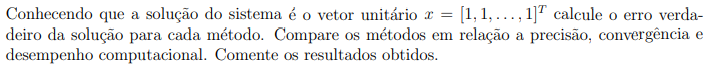

### Grafico do Tempo de Execução

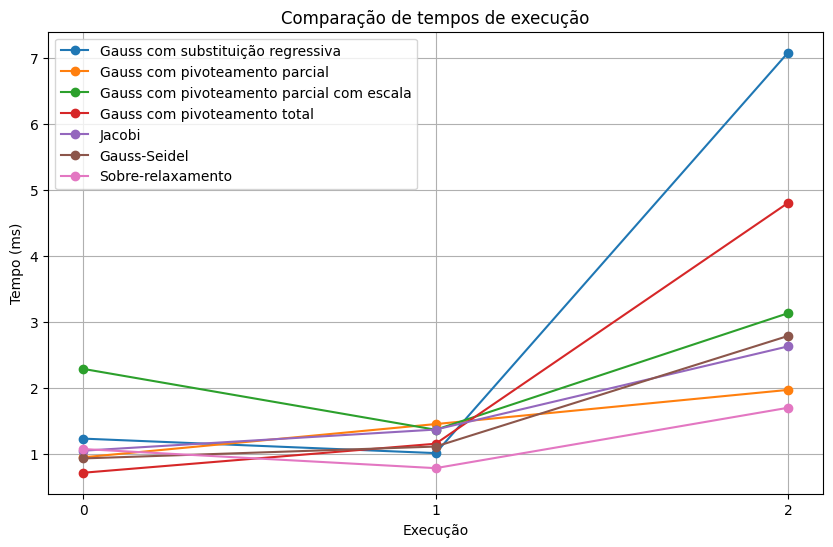

In [167]:
import matplotlib.pyplot as plt


# Plotar o gráfico de linhas para cada método
plt.figure(figsize=(10, 6))
for i, tempo in enumerate(metodos_tempo_execucao):
    plt.plot(range(len(n)), tempo, marker='o', label=metodos[i])

# Adicionar rótulos ao eixo x
plt.xticks(range(len(n)))

# Adicionar título e rótulos dos eixos
plt.title('Comparação de tempos de execução')
plt.xlabel('Execução')
plt.ylabel('Tempo (ms)')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.show()

### Calculo do Erro Relativo pela Norma de Máximo do Vetor

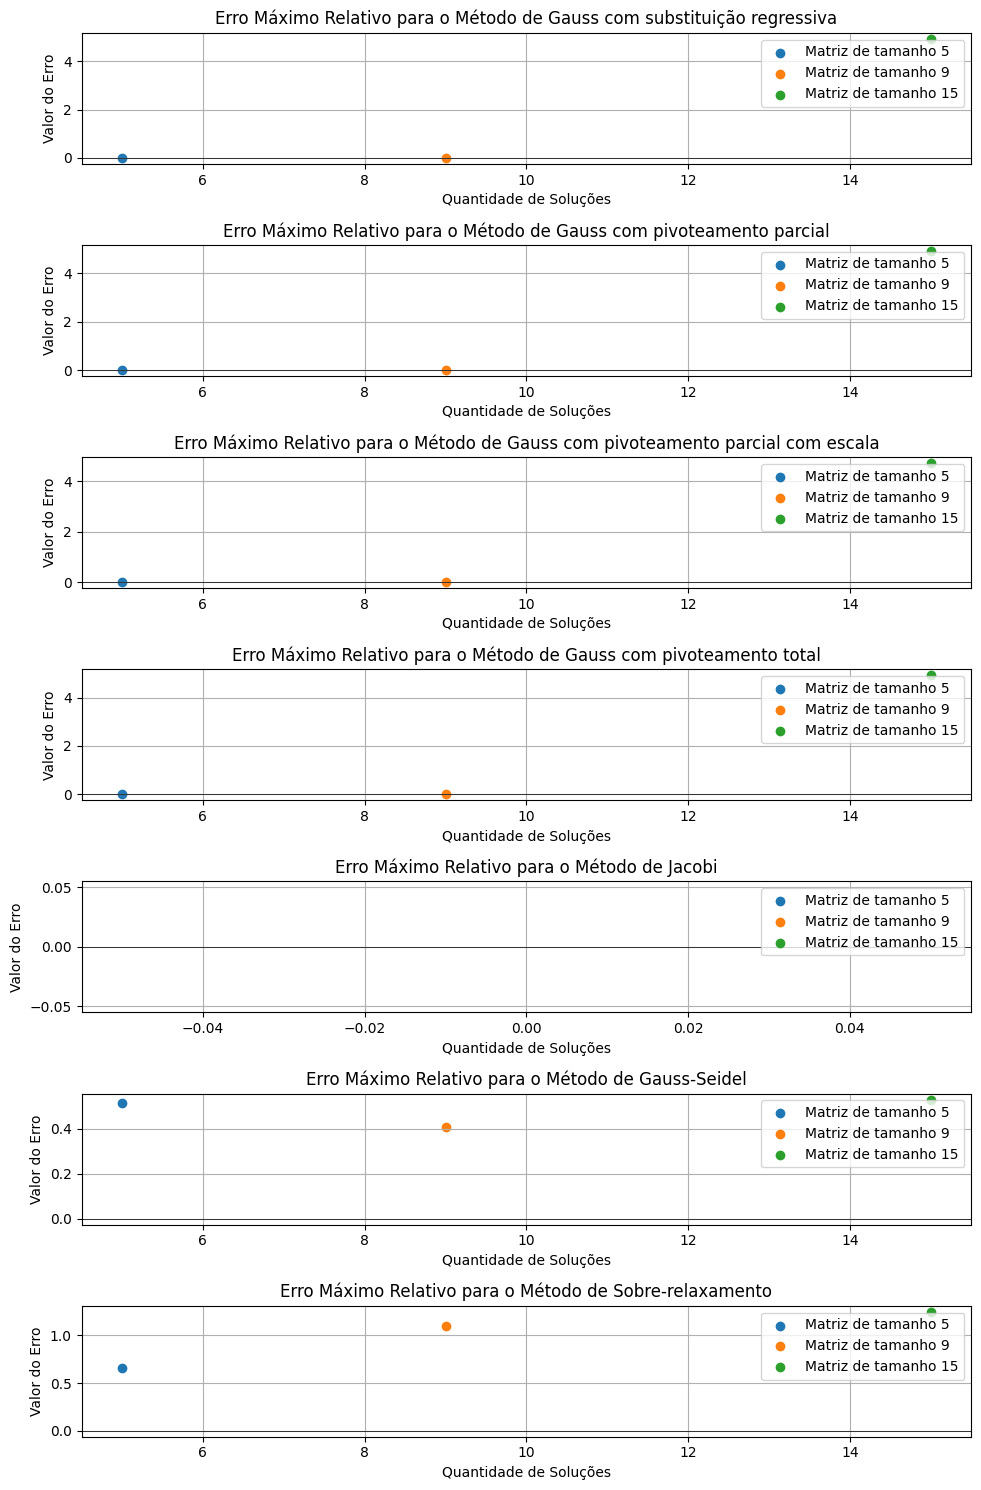

In [168]:
# Criando subplots separados para cada método
fig, axs = plt.subplots(len(metodos), 1, figsize=(10, 15))

# Plotando os gráficos para cada método
for j, metodo in enumerate(metodos):  # Para cada método
    for i in range(3):  # Para cada tamanho de matriz
        erro = np.max(np.abs(vetores_solucao[i] - metodos_vetor_solucao[j][i]) / vetores_solucao[i])
        axs[j].scatter(n[i], erro, marker='o', label=f'Matriz de tamanho {n[i]}')
    axs[j].axhline(0, color='black', linewidth=0.5)
    axs[j].set_title(f'Erro Máximo Relativo para o Método de {metodo}')
    axs[j].set_xlabel('Quantidade de Soluções')
    axs[j].set_ylabel('Valor do Erro')
    axs[j].grid(True)
    axs[j].legend()

plt.tight_layout()
plt.show()

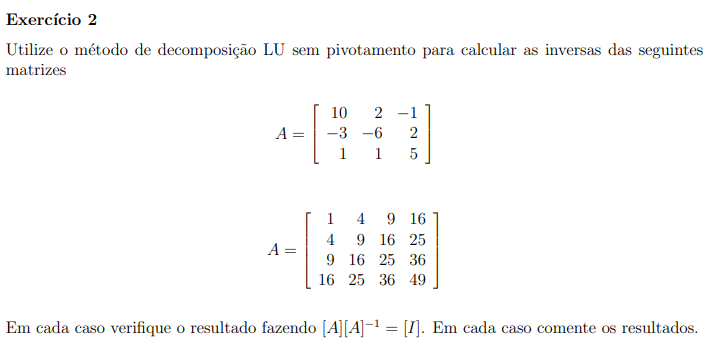

In [170]:
import numpy as np

def decomposicao_LU(matriz):
    n = len(matriz)
    # Initialize matrices L and U with zeros
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    
    for i in range(n):
        # Matriz Triangular Superior
        for k in range(i, n):
            soma = 0
            for j in range(i):
                soma += (L[i][j] * U[j][k])
            U[i][k] = matriz[i][k] - soma
        
        # Matriz Triangular Inferior
        for k in range(i, n):
            if i == k:
                L[i][i] = 1  # Elementos da Diagonal de L que são 1
            else:
                soma = 0
                for j in range(i):
                    soma += (L[k][j] * U[j][i])
                L[k][i] = (matriz[k][i] - soma) / U[i][i]
    
    return L, U

def calculando_inversa(L, U):
    n = len(L)
    # Iniciando a matriz inversa com zeros
    matriz_inversa = np.zeros((n, n))

    # Verificar se a matriz é invertível
    # Determinante muito próximo de zero
    if np.round(np.linalg.det(U), decimals=10) == 0:
        raise ValueError("A matriz não é invertível")
        
    
    # Resolvendo LY = I para Y (substituicao progressiva)
    for i in range(n):
        Y = np.zeros(n)
        Y[i] = 1
        for j in range(i):
            Y[i] -= L[i][j] * Y[j]
        Y[i] /= L[i][i]
        
        # Resolvendo UX = Y para X (substituição regressiva)
        for j in range(n-1, -1, -1):
            matriz_inversa[j][i] = Y[j]
            for k in range(j+1, n):
                matriz_inversa[j][i] -= U[j][k] * matriz_inversa[k][i]
            matriz_inversa[j][i] /= U[j][j]
    return matriz_inversa

A1 = np.array([[3, -0.1, -0.2],
              [0.1, 7, -0.3],
              [0.3, -0.2, 10]])

A2 = np.array([[1, 4, 9, 16],
              [4, 9, 16, 25],
              [9, 16, 25, 36],
              [16, 25, 36, 49]])

matrizes = [A1, A2]

for matriz in matrizes:
    print("\nMatriz A:")
    print_matriz(matriz)
    L, U = decomposicao_LU(matriz)
    print("\nMatriz L:")
    print_matriz(L)
    print("\nMatriz U:")
    print_matriz(U)

    matriz_inversa = calculando_inversa(L, U) # Invertivel
    print("\nMatriz Inversa:")
    print_matriz(matriz_inversa)

    print("\nResultado de A * A⁻¹")
    print(np.round(np.dot(matriz, matriz_inversa), decimals=1))


Matriz A:
| 3.000 -0.100 -0.200 |
| 0.100 7.000 -0.300 |
| 0.300 -0.200 10.000 |

Matriz L:
| 1.000 0.000 0.000 |
| 0.033 1.000 0.000 |
| 0.100 -0.027 1.000 |

Matriz U:
| 3.000 -0.100 -0.200 |
| 0.000 7.003 -0.293 |
| 0.000 0.000 10.012 |

Matriz Inversa:
| 0.333 0.005 0.007 |
| 0.000 0.143 0.004 |
| 0.000 0.000 0.100 |

Resultado de A * A⁻¹
[[ 1.   0.   0. ]
 [ 0.   1.   0. ]
 [ 0.1 -0.   1. ]]

Matriz A:
| 1.000 4.000 9.000 16.000 |
| 4.000 9.000 16.000 25.000 |
| 9.000 16.000 25.000 36.000 |
| 16.000 25.000 36.000 49.000 |

Matriz L:
| 1.000 0.000 0.000 0.000 |
| 4.000 1.000 0.000 0.000 |
| 9.000 2.857 1.000 0.000 |
| 16.000 5.571 3.000 1.000 |

Matriz U:
| 1.000 4.000 9.000 16.000 |
| 0.000 -7.000 -20.000 -39.000 |
| 0.000 0.000 1.143 3.429 |
| 0.000 0.000 0.000 0.000 |


ValueError: A matriz não é invertível